In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
PV_HDF_FILENAME = '~/data/pvoutput.org/UK_PV_timeseries_batch.hdf'
PV_NETCDF_FILENAME = '~/data/pvoutput.org/UK_PV_timeseries_batch.nc'

## Load PV data

In [22]:
%%time
data = []
with pd.HDFStore(PV_HDF_FILENAME, mode='r') as store:
    _, _, pv_system_ids = next(store.walk('/timeseries'))
    for i, system_id in enumerate(pv_system_ids):
        print('\r', i+1, end='', flush=True)
        hdf_key = '/timeseries/{}'.format(system_id)
        series = store.select(
            key=hdf_key, 
            columns=['datetime', 'instantaneous_power_gen_W']
        ).squeeze(axis='columns').astype(np.float32)

        if series.size > 25:
            series.name = system_id
            series = series.sort_index()
            data.append(series)
            
print()

 1495   64      CPU times: user 1min 35s, sys: 1.92 s, total: 1min 37s
Wall time: 1min 42s


In [23]:
%%time
data = pd.concat(data, axis='columns')

CPU times: user 30.4 s, sys: 2.3 s, total: 32.7 s
Wall time: 32.8 s


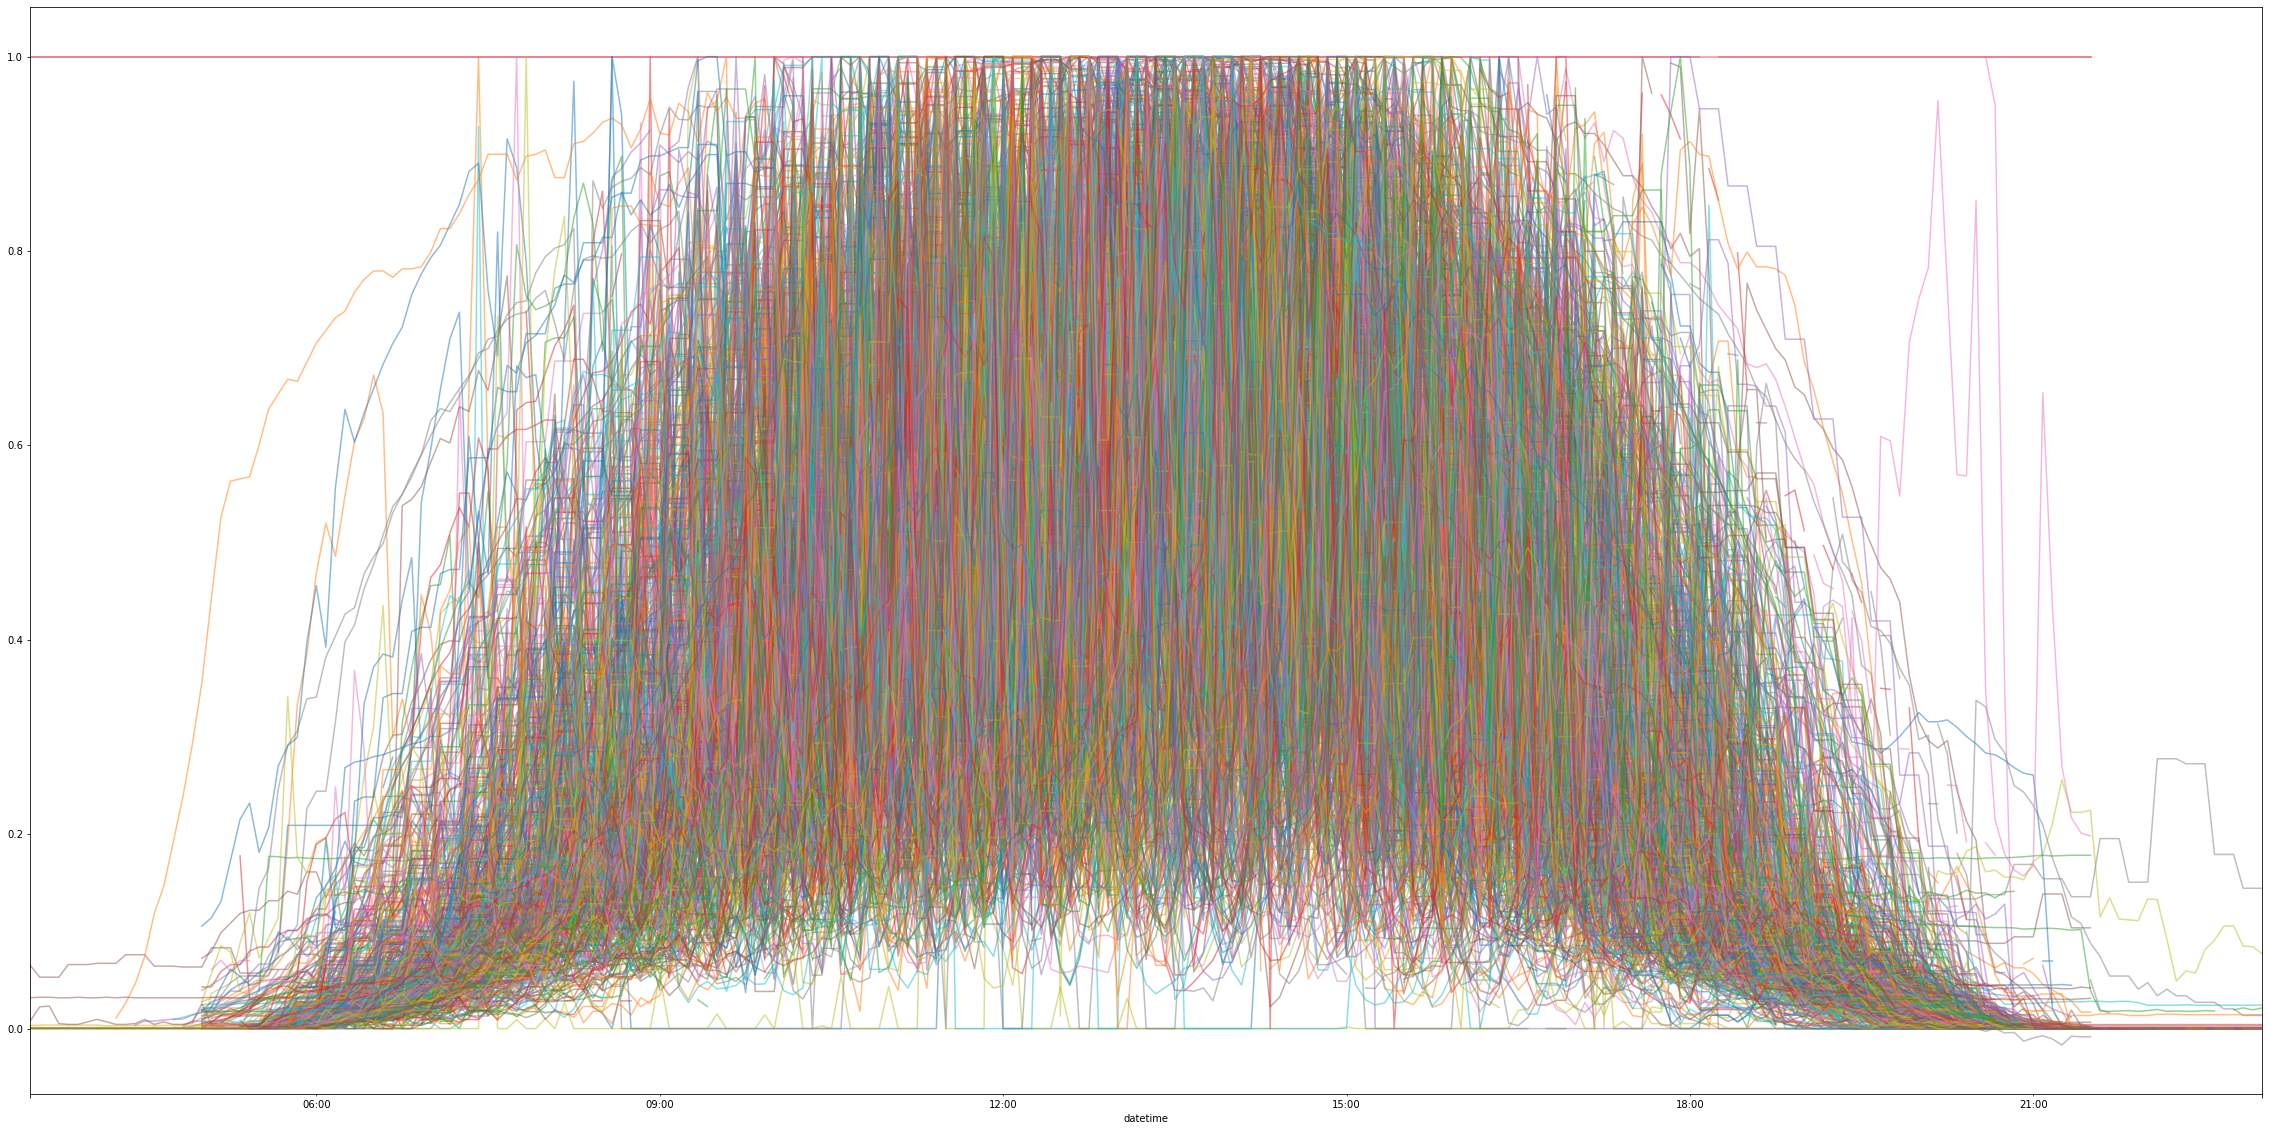

In [28]:
data_to_plot = data.loc['2019-08-01'].dropna(axis='columns', how='all')
data_to_plot = data_to_plot / data_to_plot.max()
data_to_plot.plot(figsize=(40, 20), legend=False, alpha=0.5);

In [31]:
%%time
data_array = data.to_xarray()
compression = {'zlib': True, 'complevel': 5}
encoding = {var_name: compression for var_name in data_array}
data_array.to_netcdf(PV_NETCDF_FILENAME, encoding=encoding)

CPU times: user 8min 56s, sys: 484 ms, total: 8min 56s
Wall time: 8min 57s
